In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style("ticks", {"axes.grid": True, "grid.color": "0.95", "grid.linestyle": "-"})

# Import Data

In [14]:
ticker_df = pd.read_csv('../data/clean/ticker.csv')
ticker_5s_df = pd.read_csv('../data/clean/ticker_5s.csv')
ticker_1s_df = pd.read_csv('../data/clean/ticker_1s.csv')

# Prep Data

In [15]:
# I will use 5s bars from the August minutes for the rest of this notebook
ticker_resample_df = ticker_5s_df.query('date == "2020-08-19"').copy()

In [16]:
# Fix datetime column and sort data
ticker_resample_df['datetime'] = pd.to_datetime(ticker_resample_df['datetime'])
ticker_resample_df = ticker_resample_df.sort_values(by = ['ticker', 'date', 'datetime'])

In [17]:
# Select rv measure
ticker_resample_df['realized_volatility'] = ticker_resample_df['two_scale_realized_vol_100']

In [18]:
ticker_resample_df.head()

,ticker,ticker_desc,ticker_desc_short,date,datetime,price,log_price,return,return_5s,return_60s,rv_sub,two_scale_realized_var,sigma_2_hat,two_scale_realized_var_biased,two_scale_realized_vol,two_scale_realized_vol_100,realized_volatility
23400,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-08-19,2020-08-19 09:30:00,121.915,4.803324,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23401,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-08-19,2020-08-19 09:30:05,121.910,4.803283,-0.000041,-0.000041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23402,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-08-19,2020-08-19 09:30:10,121.920,4.803365,0.000082,0.000082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23403,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-08-19,2020-08-19 09:30:15,121.920,4.803365,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23404,IEF,iShares 7-10 Year Treasury Bond ETF,7-10 Year,2020-08-19,2020-08-19 09:30:20,121.930,4.803447,0.000082,0.000082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot Data

## RV

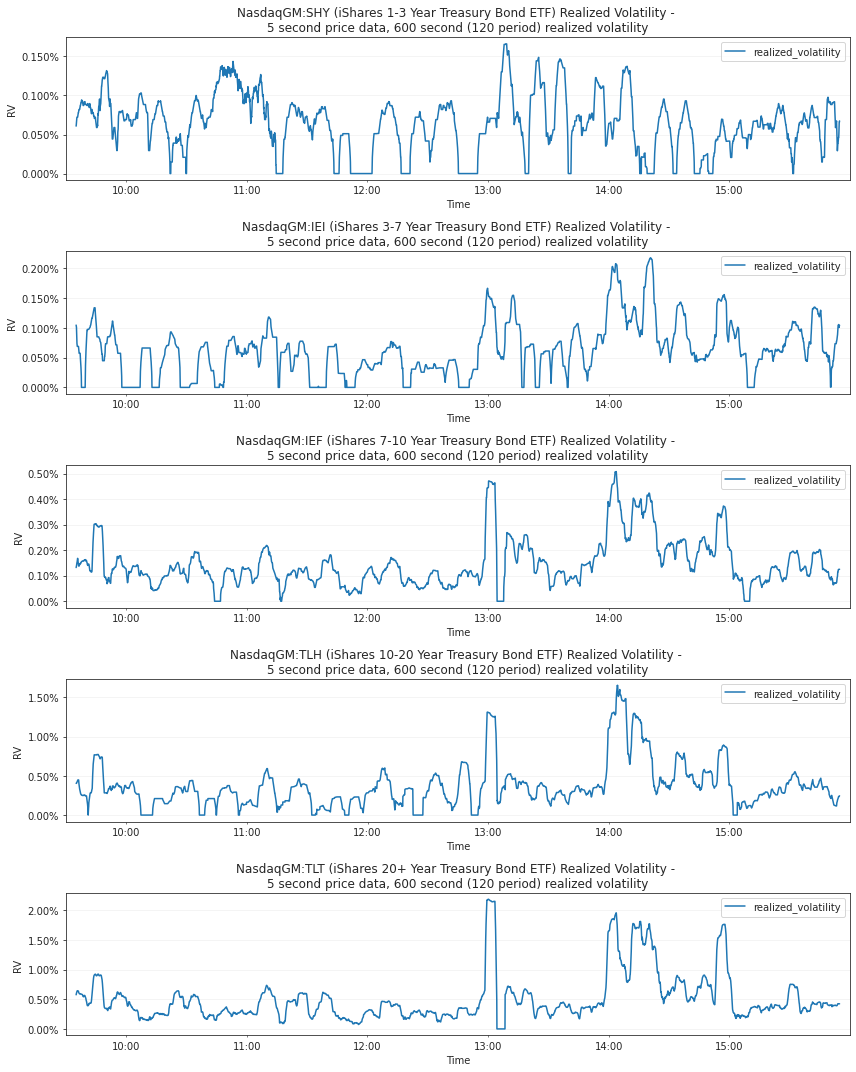

In [19]:
ordered_tickers = ["SHY", "IEI", "IEF", "TLH", "TLT"]
fig, ax = plt.subplots(figsize=(12, 15), nrows=5, ncols=1)

for i in range(len(ordered_tickers)):

    ticker = ordered_tickers[i]
    ax = plt.subplot(len(ordered_tickers), 1, i + 1)

    # RV
    plot_data = ticker_resample_df.query("ticker == @ticker")
    plot_data.plot(x="datetime", y="realized_volatility", ax=ax)
    ax.axvline(x=pd.to_datetime("2020-08-23 14:00:00"), ymin=0, ymax=1, lw=1, ls="--", color="k")

    # Settings
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
    ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=15))
    plt.title(
        f'NasdaqGM:{ticker} ({ticker_resample_df.query("ticker == @ticker")["ticker_desc"].iloc[0]})'
        + " Realized Volatility - \n5 second price data, 600 second (120 period) realized volatility"
    )
    plt.xlabel("Time")
    plt.ylabel("RV")

plt.tight_layout()
plt.savefig("../exhibits/ishares_5s_rv.png", dpi=300)

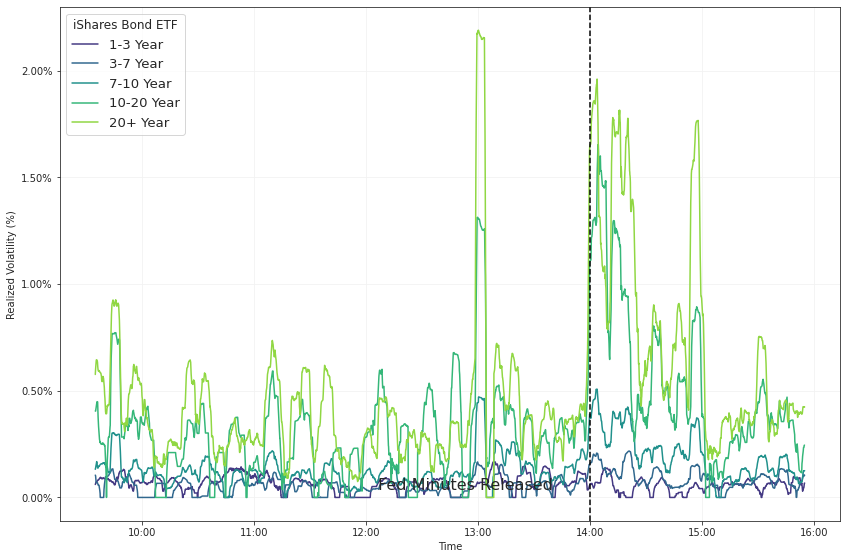

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.2)

# Plot price index
sns.lineplot(
    x="datetime",
    y="realized_volatility",
    hue="ticker_desc_short",
    hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
    palette=sns.color_palette("viridis", 5),
    data=ticker_resample_df,
    **{"lw": 1.5}
)
# Vline at 2PM
ax.axvline(
    x=pd.to_datetime("2020-08-19 14:00:00"), ymin=0, ymax=1, lw=1.5, ls="--", color="k",
)
# Text
plt.text(
    pd.to_datetime("2020-08-19 13:40:00"),
    0.065,
    "Fed Minutes Released",
    size=16,
    ha="right",
    va="center_baseline",
)

# Plot settings
plt.ylabel("Realized Volatility (%)")
plt.xlabel("Time")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc="upper left", handles=handles[1:], labels=labels[1:], title="iShares Bond ETF")

# Save
plt.tight_layout()
# plt.savefig("../exhibits/ishares_5s_rv_20200819.png", dpi=300)

## Log Price

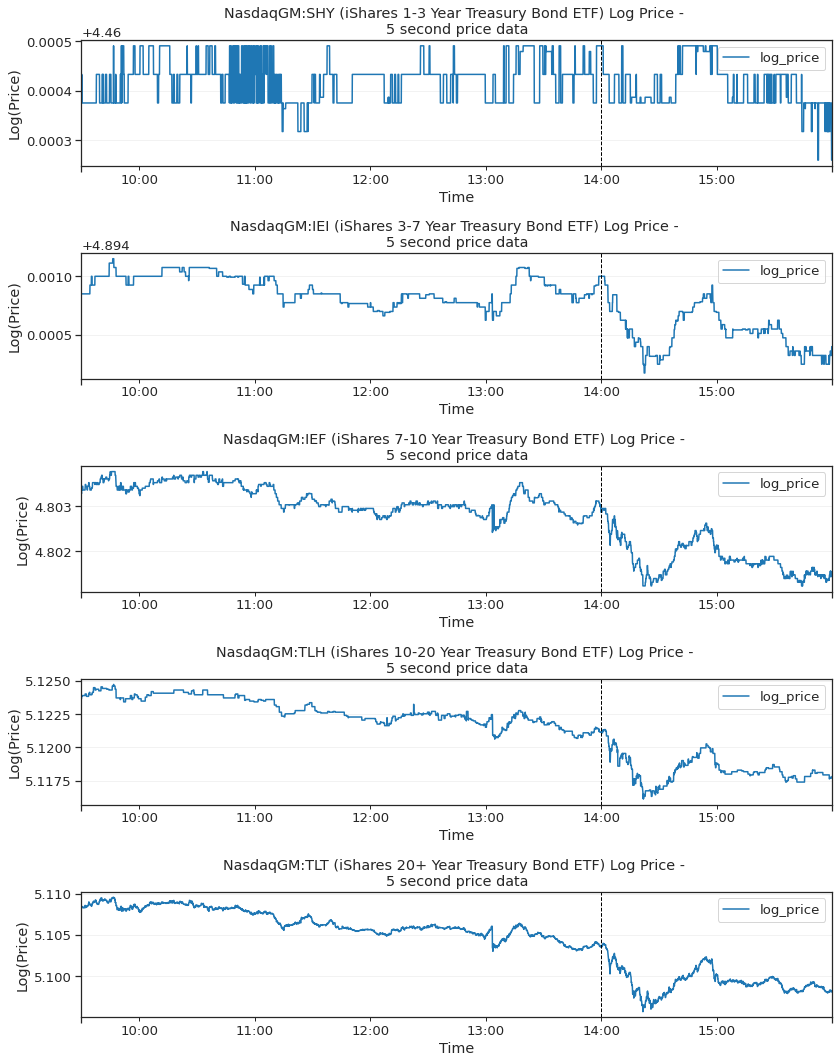

In [21]:
ordered_tickers = ["SHY", "IEI", "IEF", "TLH", "TLT"]
fig, ax = plt.subplots(figsize=(12, 15), nrows=5, ncols=1)

for i in range(len(ordered_tickers)):

    ticker = ordered_tickers[i]
    ax = plt.subplot(len(ordered_tickers), 1, i + 1)

    # Log Price
    plot_data = ticker_resample_df.query("ticker == @ticker")
    plot_data.plot(x="datetime", y="log_price", ax=ax)
    ax.axvline(x=pd.to_datetime("2020-08-19 14:00:00"), ymin=0, ymax=1, lw=1, ls="--", color="k")

    plt.title(
        f'NasdaqGM:{ticker} ({ticker_resample_df.query("ticker == @ticker")["ticker_desc"].iloc[0]})'
        + " Log Price - \n5 second price data"
    )
    plt.xlabel("Time")
    plt.ylabel("Log(Price)")

plt.tight_layout()
plt.savefig("../exhibits/ishares_5s_logprice.png", dpi=300)

## Indexed Price

ValueError: Could not interpret input 'price_indexed'

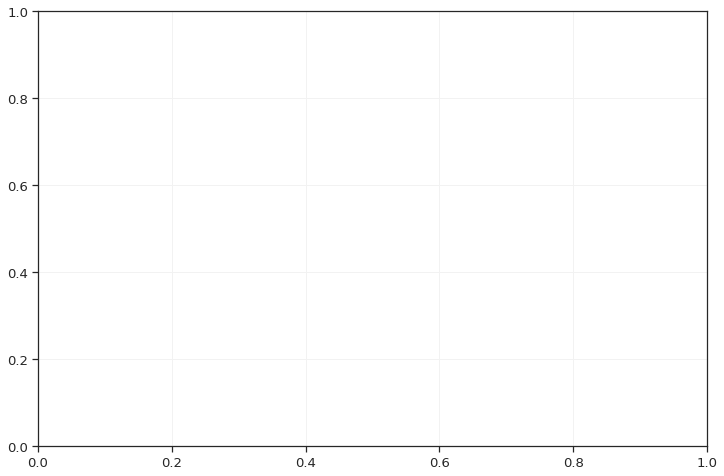

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.2)

# Plot price index
sns.lineplot(
    x="datetime",
    y="price_indexed",
    hue="ticker_desc_short",
    hue_order=["1-3 Year", "3-7 Year", "7-10 Year", "10-20 Year", "20+ Year"],
    palette=sns.color_palette("viridis", 5),
    data=ticker_resample_df,
    **{"lw": 1.5}
)
# Vline at 2PM
ax.axvline(x=pd.to_datetime("2020-08-19 14:00:00"), ymin=0, ymax=1, lw=1.5, ls=(0, (5, 5)), color="k")
# Text
plt.text(
    pd.to_datetime("2020-08-19 13:50:00"),
    99.3,
    "Fed Minutes Released",
    size=16,
    ha="right",
    va="center_baseline",
)

# Plot settings
plt.ylabel("Price Index (09:30:00 = 100)")
plt.xlabel("Time")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

# Fix legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc="lower left", handles=handles[1:], labels=labels[1:], title="iShares Bond ETF")

# Save
plt.tight_layout()
plt.savefig("../exhibits/ishares_5s_priceidx.png", dpi=300)